# Plotting with categorical data
https://seaborn.pydata.org/tutorial/categorical.html

In [5]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(0)

In [7]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [9]:
titanic.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [10]:
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [11]:
iris.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Categorical scatterplots

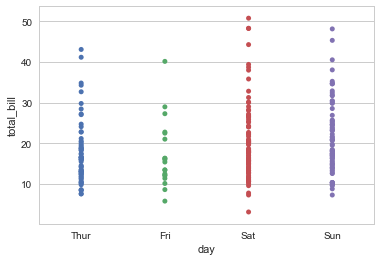

In [8]:
sns.stripplot(x="day", y="total_bill", data=tips);

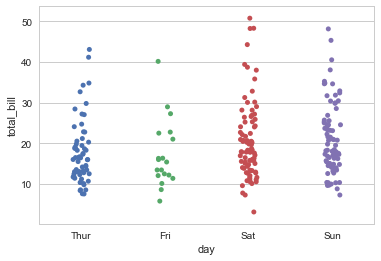

In [12]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

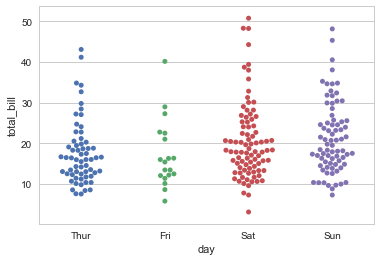

In [13]:
sns.swarmplot(x="day", y="total_bill", data=tips);

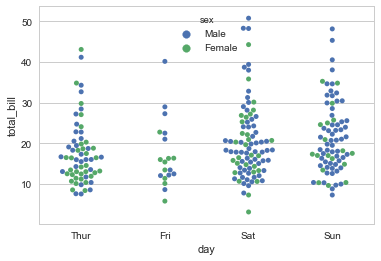

In [14]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

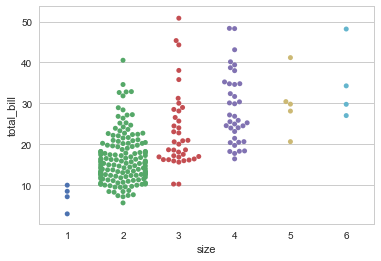

In [15]:
sns.swarmplot(x="size", y="total_bill", data=tips);

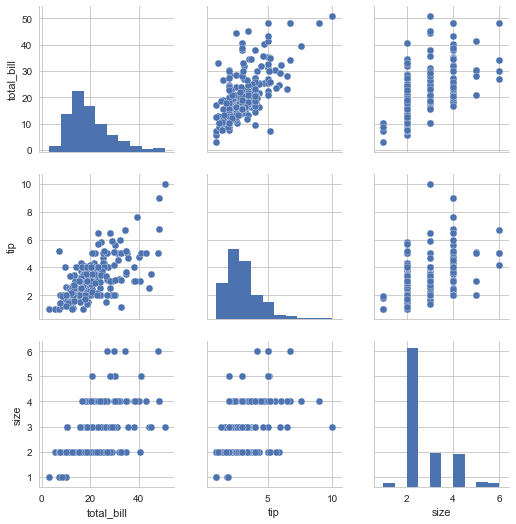

In [18]:
sns.pairplot(tips);

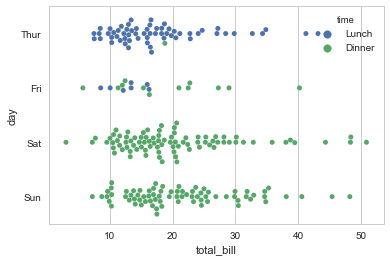

In [19]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## Distributions of observations within categories

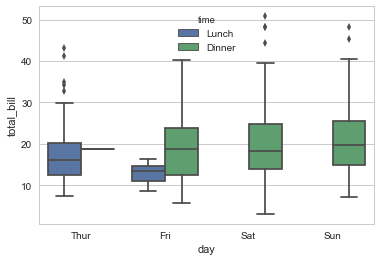

In [20]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

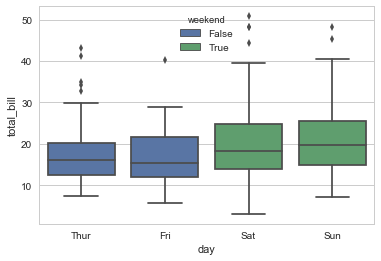

In [21]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

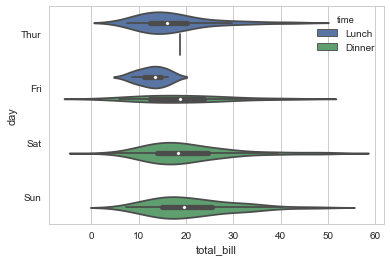

In [23]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

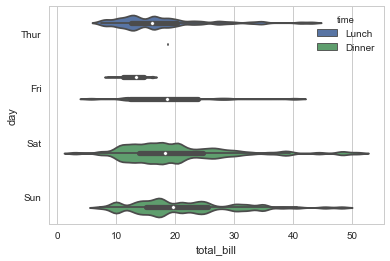

In [24]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

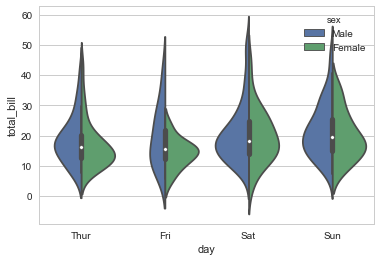

In [25]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, 
               split=True);

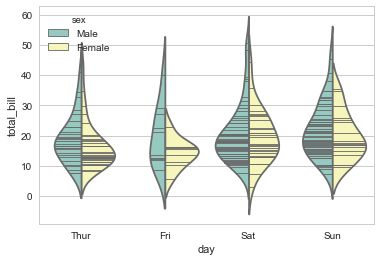

In [26]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, 
               inner="stick", palette="Set3");

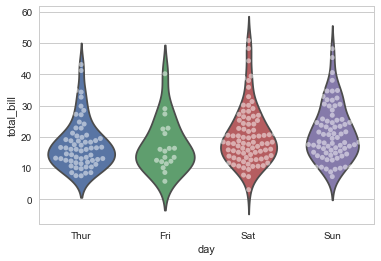

In [28]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

## Statistical estimation within categories

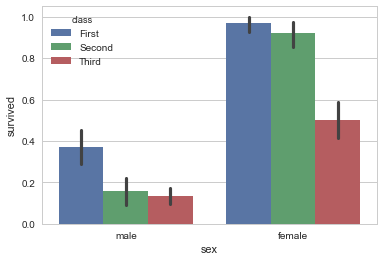

In [29]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

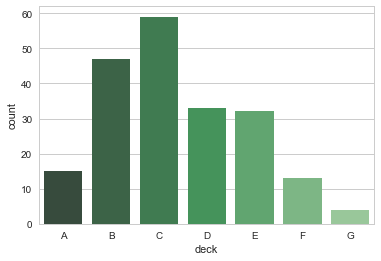

In [30]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

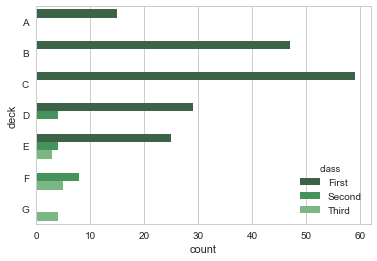

In [31]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

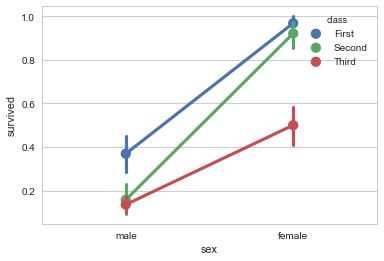

In [32]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

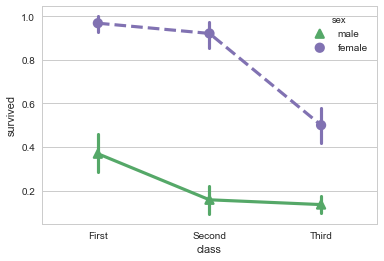

In [33]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

## Plotting “wide-form” data

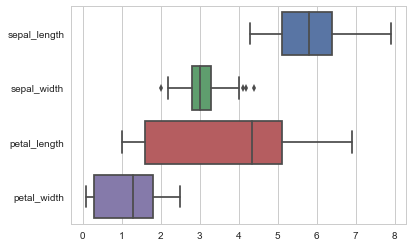

In [34]:
sns.boxplot(data=iris, orient="h");

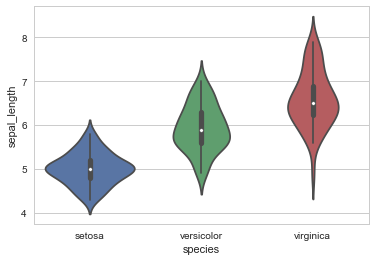

In [35]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

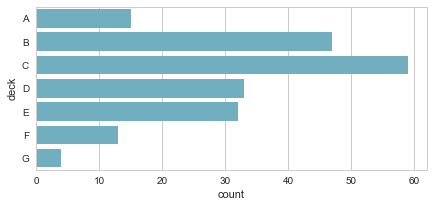

In [36]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

## Drawing multi-panel categorical plots

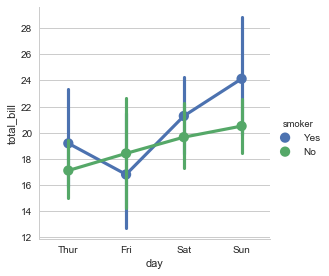

In [37]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

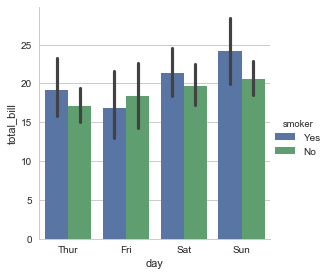

In [38]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

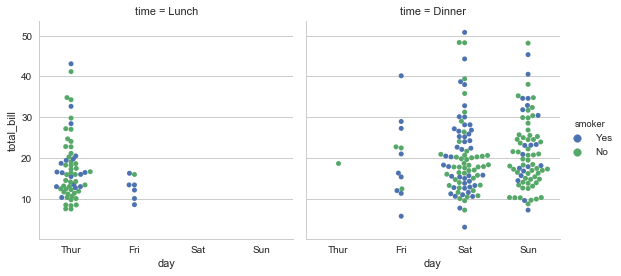

In [39]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

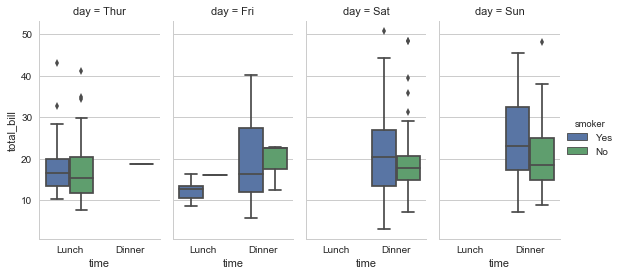

In [40]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

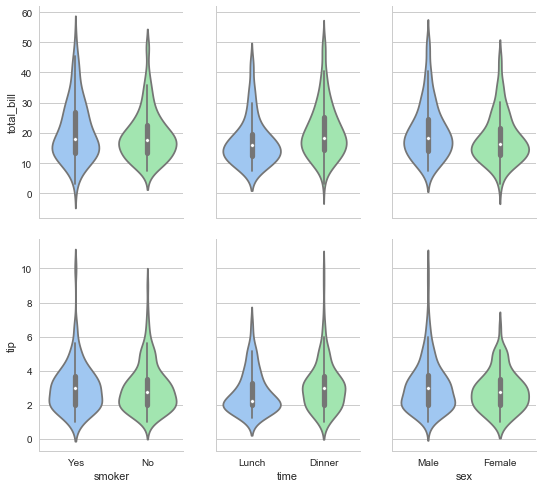

In [42]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");